In [2]:
pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sultanfastakhiev","key":"a6dda34729816a7d5b43d632644556c7"}'}

In [6]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
! cp kaggle.json ~/.kaggle

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets list

ref                                                                            title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
datasets/muratkokludataset/acoustic-extinguisher-fire-dataset                  Acoustic Extinguisher Fire Dataset               621KB  2022-04-02 22:59:36            491        541  0.9375           
datasets/muhmores/spotify-top-100-songs-of-20152019                            Spotify Top 100 Songs of 2010-2019               139KB  2022-04-09 06:35:36           2737         67  0.8235294        
datasets/muratkokludataset/rice-image-dataset                                  Rice Image Dataset                               219MB  2022-04-03 02:12:00            436        507  0.875            


In [10]:
! kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

100% 1.51G/1.52G [00:15<00:00, 109MB/s]
100% 1.52G/1.52G [00:15<00:00, 107MB/s]


In [11]:
! unzip ct-kidney-dataset-normal-cyst-tumor-and-stone.zip -d content

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4363).jpg  
  inflating: content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4364).jpg  
  inflating: content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4365).jpg  
  inflating: content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4366).jpg  
  inflating: content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4367).jpg  
  inflating: content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4368).jpg  
  inflating: content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4369).jpg  
 

In [12]:
import os

In [13]:
os.listdir('content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

['Stone', 'Cyst', 'Tumor', 'Normal']

In [14]:
path_main = 'content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

In [15]:
for folder in os.listdir(path_main):
  list_of_elements = os.listdir(os.path.join(path_main, folder))
  print(f'Folder: {folder}\n')
  print(f'Number of elements: {len(list_of_elements)}\n')
  print('*****************')

Folder: Stone

Number of elements: 1377

*****************
Folder: Cyst

Number of elements: 3709

*****************
Folder: Tumor

Number of elements: 2283

*****************
Folder: Normal

Number of elements: 5077

*****************


In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl

In [17]:
def plot_image(item_dir, num=25):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs[:num]]

  plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5, 5, idx + 1)
    img = plt.imread(img_path)
    plt.title(f'{img_path}'[-10 : -4])
    plt.imshow(img)

In [18]:
path_tumor = f'{path_main}/Tumor'
path_cyst = f'{path_main}/Cyst'
path_stone = f'{path_main}/Stone'
path_normal = f'{path_main}/Normal'

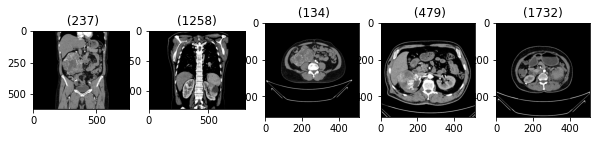

In [19]:
plot_image(path_tumor, 5)

In [20]:
os.listdir('content/')

['CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone', 'kidneyData.csv']

Подкотовка датасета


In [21]:
import pandas as pd


In [22]:
data_path = 'content/kidneyData.csv'
data = pd.read_csv(data_path, header=0)

In [23]:
data.head()

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12446 non-null  int64 
 1   image_id    12446 non-null  object
 2   path        12446 non-null  object
 3   diag        12446 non-null  object
 4   target      12446 non-null  int64 
 5   Class       12446 non-null  object
dtypes: int64(2), object(4)
memory usage: 583.5+ KB


In [25]:
data.Class.unique()

array(['Tumor', 'Normal', 'Stone', 'Cyst'], dtype=object)

In [26]:
! pip install split-folders

In [27]:
import splitfolders
splitfolders.ratio(path_main, output='./dataset', seed=14, ratio = (0.70, 0.15, 0.15))

Copying files: 12446 files [00:08, 1457.40 files/s]


In [28]:
from keras.preprocessing.image import ImageDataGenerator

In [29]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)
valid_datagen = ImageDataGenerator(rescale = 1/255)

In [30]:
train_dataset = train_datagen.flow_from_directory('./dataset/train',
                                                  target_size=(200, 200),
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  batch_size= 100)
test_dataset = train_datagen.flow_from_directory('./dataset/test',
                                                  target_size=(200, 200),
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  batch_size= 100)
valid_dataset = train_datagen.flow_from_directory('./dataset/val',
                                                  target_size=(200, 200),
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  batch_size= 100)

Found 8710 images belonging to 4 classes.
Found 1871 images belonging to 4 classes.
Found 1865 images belonging to 4 classes.


In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPool2D(2))


model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [32]:
import keras

In [33]:
m = ['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=m)

In [ ]:
train_model = model.fit(train_dataset, validation_data=valid_dataset, epochs=4)

Epoch 1/4
88/88 [==============================] - 592s 7s/step - loss: 1.1333 - accuracy: 0.5413 - precision: 0.6655 - recall: 0.3406 - val_loss: 0.7922 - val_accuracy: 0.6826 - val_precision: 0.7820 - val_recall: 0.5903
Epoch 2/4
88/88 [==============================] - 583s 7s/step - loss: 0.4802 - accuracy: 0.8135 - precision: 0.8568 - recall: 0.7730 - val_loss: 0.1719 - val_accuracy: 0.9265 - val_precision: 0.9348 - val_recall: 0.9228
Epoch 3/4
88/88 [==============================] - 586s 7s/step - loss: 0.1350 - accuracy: 0.9596 - precision: 0.9635 - recall: 0.9571 - val_loss: 0.0316 - val_accuracy: 0.9914 - val_precision: 0.9914 - val_recall: 0.9909
Epoch 4/4
88/88 [==============================] - 576s 7s/step - loss: 0.1035 - accuracy: 0.9746 - precision: 0.9770 - recall: 0.9721 - val_loss: 0.0162 - val_accuracy: 0.9952 - val_precision: 0.9952 - val_recall: 0.9941


In [ ]:
kidney_classes = data['Class'].value_counts()
sum_elements = kidney_classes.sum()
sum_elements

12446

AttributeError: ignored

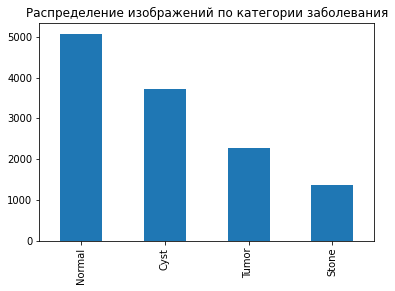

In [51]:
plot_distribution = kidney_classes.plot.bar(title='Распределение изображений по категории заболевания')
plot_distribution.bar_label(plot_distribution.containers[0])

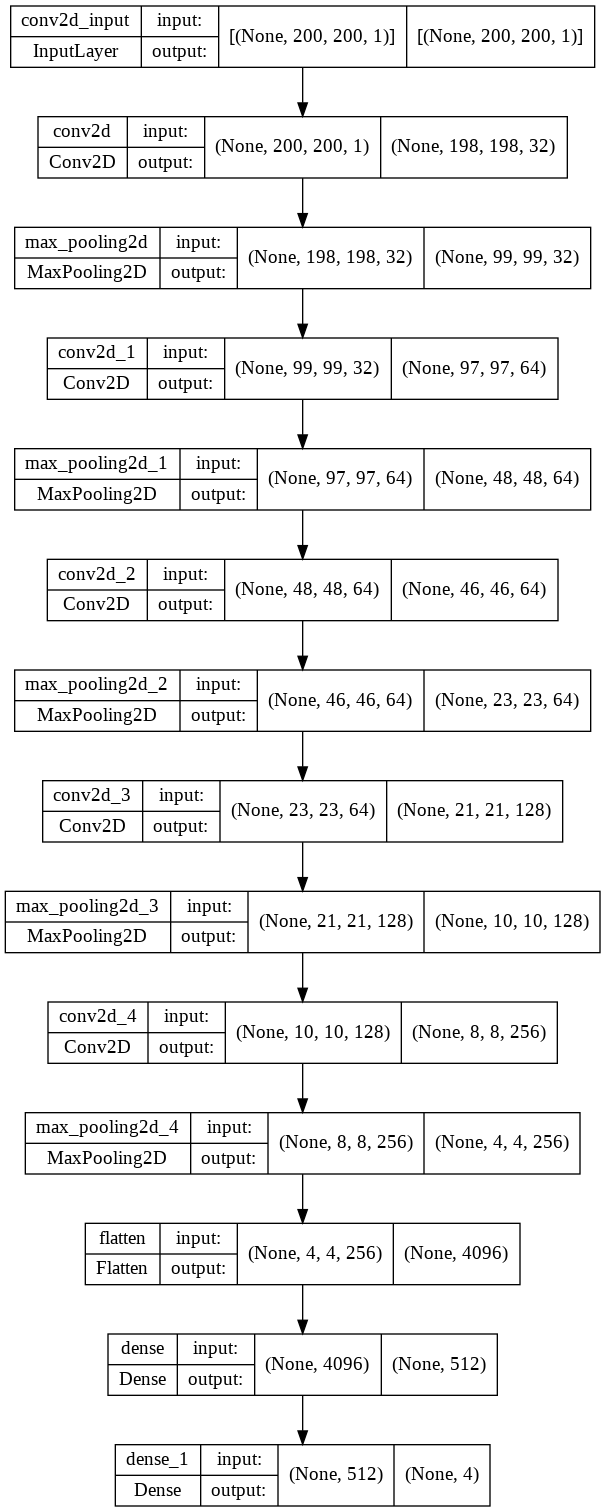

In [37]:
import tensorflow as tf
tf.keras.utils.plot_model(model, to_file='architecture.png', show_shapes=True, show_layer_names=True)

In [40]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [64]:

model.save('/content/gdrive/MyDrive/Big_ch/model.h5')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np 

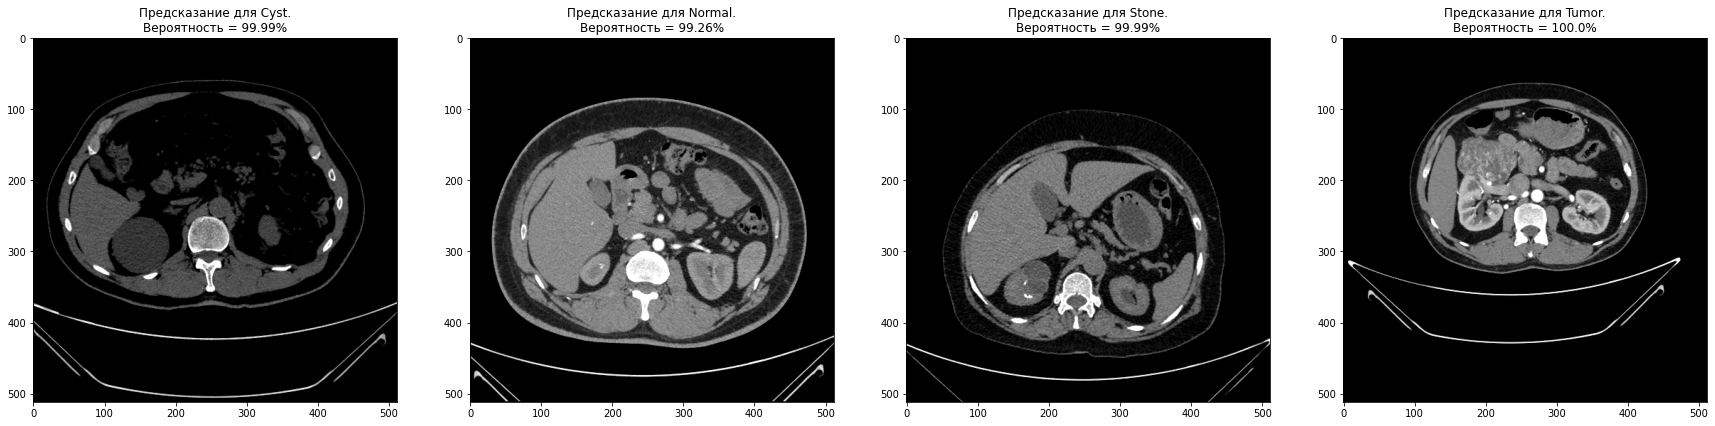

In [41]:
def load_image(img_path):
  img = image.load_img(img_path, target_size=(200, 200), color_mode='grayscale')
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /=255.
  return img_tensor
if __name__ == '__main__':
  model = load_model('/content/gdrive/MyDrive/Big_ch/model.h5')
  main_path = 'content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'
  categories = [['Cyst', 345], ['Normal', 23], ['Stone', 50], ['Tumor', 20]]
  pred = []
  plt.figure(figsize=(30,20))

  for i in range(len(categories)):
    img_path = f'{main_path}/{categories[i][0]}/{categories[i][0]}- ({categories[i][1]}).jpg'
    new_image = load_image(img_path)
    prediction = model.predict(new_image)
    pred.append(prediction[0].tolist())
    plt.subplot(1, 4, i+1)
    img = plt.imread(img_path)
    plt.title(f'Предсказание для {categories[i][0]}.\nВероятность = {round(max(pred[i]) * 100, 2)}%')
    plt.imshow(img)